In [1]:
# dependencies
from keras.datasets import boston_housing

In [ ]:
# Notes:
# - Regression is done using different loss functions than what we used for classification.
# Mean squared error (MSE) is a loss function commonly used for regres- sion.
# - Evaluation metrics to be used for regression differ from those used for classification
# Common regression metric is mean absolute error (MAE).
# - When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
# - When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
# - When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), 
# in order to avoid severe overfitting

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [4]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)

print(train_data[:3])
print(train_targets[:3])

(404, 13)
(102, 13)
(404,)
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]]
[15.2 42.3 50. ]


In [6]:
# Preparing the data
# It would be problematic to feed into a neural network values that all take wildly differ- ent ranges.
# A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data 
# (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, 
# so that the feature is centered around 0 and has a unit standard deviation. 

# normalize train data
mean = train_data.mean(axis=0)
print(mean)
train_data -= mean
std = train_data.std(axis=0)
print(std)
train_data /= std

# normalize test data
test_data -= mean
test_data /= std

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [7]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)

print(train_data[:3])
print(train_targets[:3])

(404, 13)
(102, 13)
(404,)
[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]]
[15.2 42.3 50. ]


In [9]:
# Building your network
from keras import models
from keras import layers

# notes:
# the network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression
# note that you compile the network with the mse loss function—mean squared error, the square of the difference between the predictions 
# and the targets. This is a widely used loss function for regression problems.
# monitor using mean absolute error (MAE).

input_shape = train_data.shape[1]
print(input_shape)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

13


In [10]:
# Validating your approach using K-fold validation
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # validation data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # training data
    partial_train_data = np.concatenate(
        [ train_data[:i * num_val_samples],
          train_data[(i + 1) * num_val_samples:] ],
        axis=0)
    partial_train_targets = np.concatenate(
        [ train_targets[:i * num_val_samples],
          train_targets[(i + 1) * num_val_samples:] ],
        axis=0)

    # build model already compiled
    model = build_model()
    # train
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
print(all_scores)
print(np.mean(all_scores))

[2.0383613109588623, 2.3496155738830566, 2.6840782165527344, 2.266479969024658]
2.334633767604828


In [19]:
# k-fold validation
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    # validation data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # build model already compiled
    model = build_model()
    # train
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

print('finish k validation')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) ]
print(len(average_mae_history))

500


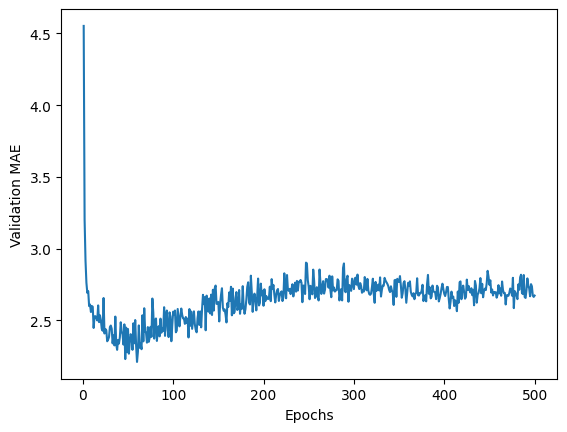

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

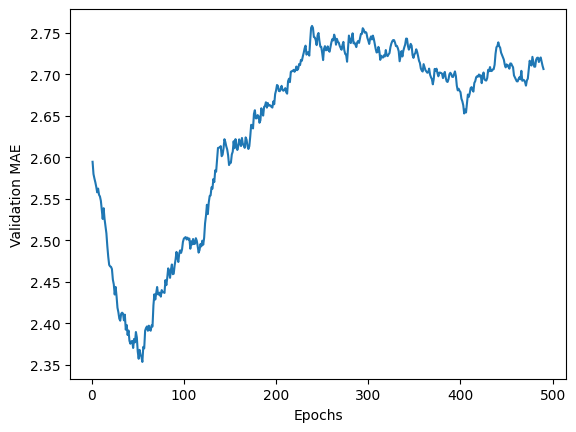

In [24]:
# It may be a little difficult to see the plot
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Notes:
# According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.

In [25]:
# Once you’re finished tuning other parameters of the model (in addition to the number of epochs, 
# you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, 
# with the best parameters, and then look at its performance on the test data.
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

# Notes
# The average (3.0) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. 
# In this case, you’re off by $3,000 on average, which is significant considering that the prices range from $10,000 to $50,000.

4/4 [==============================] - 0s 810us/step - loss: 22.5313 - mae: 3.2330
3.2329747676849365
